# Funksjoner av flere variable (MIP 12.1)

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

En funksjon $f: \mathbb{R}^n \to \mathbb{R}$ tar et punkt
$\mathbf{x} \in \mathbb{R}^n$ til et reelt tall
$f(\mathbf{x}) \in \mathbb{R}$.

Funksjoner av to variable er funksjoner på formen
$f \colon \mathbb{R}^2 \to \mathbb{R}$. Slike funksjoner kan illustreres
ved å tegne den tilhørende graf.

## Grafen til en funksjon av to variabler

**Eksempel 1**. La $f: \mathbb{R}^2 \to \mathbb{R}$ være gitt ved
$$f(\begin{bmatrix} x_1 \\ x_2 \end{bmatrix}) = x_1^2 + x_2^2.$$ Dette
er en funksjon som tar et punkt $\begin{bmatrix} x_1 \\ x_2
  \end{bmatrix} \in \mathbb{R}^2$ til et reelt tall
$f(\begin{bmatrix} x_1 \\ x_2 \end{bmatrix}) = x_1^2 + x_2^2.$


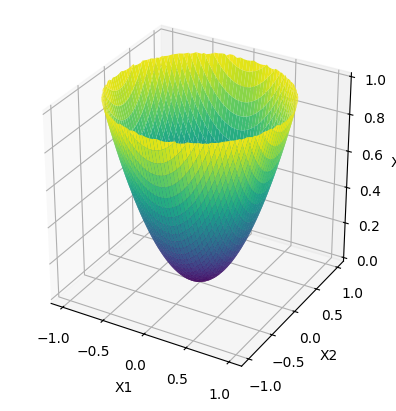

In [23]:
# @title Plotter
# Define the function
def f(x):
    x1, x2 = x
    z = x1**2 + x2**2
    return np.where(z <=1, z, np.nan)

# Create a grid of x and y values
x1 = np.linspace(-1, 1, 300)
x2 = np.linspace(-1, 1, 300)
x = np.meshgrid(x1, x2)

# Compute the function values
x3 = f(x)

# # Mask values outside the unit disc
# mask = x**2 + y**2 > 1  # Create a boolean mask for points outside the unit disc
# z[mask] = np.nan  # Set values outside the unit disc to NaN (they won't be plotted)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(x[0], x[1], x3, cmap='viridis', edgecolor='none')

# Set labels
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')

# Set the aspect ratio to be equal
ax.set_box_aspect([1, 1, 1])

**Eksempel 2**. La $A = [a_1, a_2, \dots, a_n]$ være en rad vektor. Gitt
et punkt $\mathbf{x} \in \mathbb{R}^n$ kan vi tenke på det som en vektor
$\vec{\mathbf{x}} \in \mathbb{R}^n$, og la
$f: \mathbb{R}^n \to \mathbb{R}$ være gitt ved
$$f(\mathbf{x}) = A\cdot \vec{\mathbf{x}}.$$ Dette er en funksjon som
tar et punkt $\mathbf{x} \in \mathbb{R}^n$ til tallet
$f(\mathbf{x}) = A\cdot \vec{\mathbf{x}} \in \mathbb{R}$. (Egentlig er
et punkt og en vektor det samme!)

For $n = 2$ er dette en funksjon $f \colon \mathbb{R}^2 \to \mathbb{R}$,
så vi kan tegne grafen til $f$. Vi illustrer dette for $A = [1, 2]$.


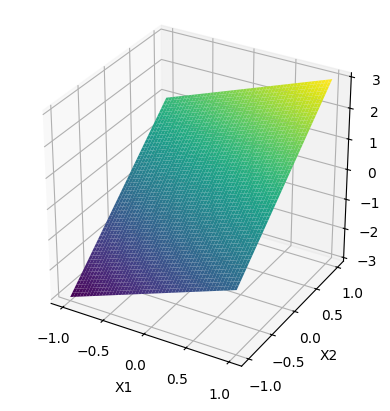

In [24]:
# @title Plotter
A = np.array([[1, 2]])

# Define the function
def f(x):
    x1, x2 = x
    return (A @ np.vstack([[x1.ravel(), x2.ravel()]])).reshape(x1.shape)

# Create a grid of x and y values
x1 = np.linspace(-1, 1, 300)
x2 = np.linspace(-1, 1, 300)
x = np.meshgrid(x1, x2)

# Compute the function values
x3 = f(x)

# # Mask values outside the unit disc
# mask = x**2 + y**2 > 1  # Create a boolean mask for points outside the unit disc
# z[mask] = np.nan  # Set values outside the unit disc to NaN (they won't be plotted)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(x[0], x[1], x3, cmap='viridis', edgecolor='none')

# Set labels
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')

# Set the aspect ratio to be equal
ax.set_box_aspect([1, 1, 1])

**Eksempel 3**. La $f$ være gitt ved
$$f(\begin{bmatrix} x_1 \\ x_2 \end{bmatrix}) = \sqrt{1 - x_1^2 + x_2^2}.$$
Denne funksjonen er ikke definert for alle punktene i $\mathbb{R}^2$.
Hvis vi skriver $D$ for mengden av punkter
$\begin{bmatrix}x_1\\x_2\end{bmatrix}$ i $\mathbb{R}^2$ med
$x_1^2 + x_2^2 \le 0$, da kan vi skrive at $f$ er en funksjon
$f \colon D \to \mathbb{R}$.

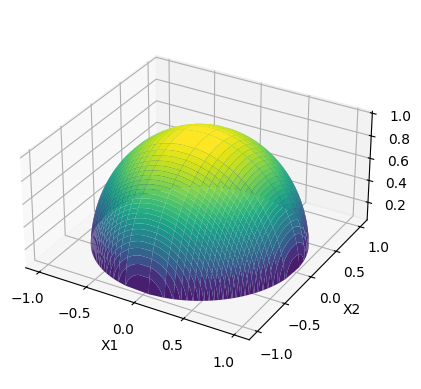

In [25]:
# @title Plotter
# Define the function
def f(x):
    x1, x2 = x
    # bemerk at hvis x ikke er i D, da lar vi f være ikke definert, eller nan for not a number
    return np.where(x1**2 + x2**2 <1, np.sqrt(np.maximum(1 - x1**2 - x2**2, 0)), np.nan)

# Create a grid of x and y values
x1 = np.linspace(-1, 1, 300)
x2 = np.linspace(-1, 1, 300)
x1 = np.sign(x1) * np.sqrt(np.abs(x1))
x2 = np.sign(x2) * np.sqrt(np.abs(x2))
x = np.meshgrid(x1, x2)

# Compute the function values
x3 = f(x)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(x[0], x[1], x3, cmap='viridis', edgecolor='none')

# Set labels
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')

# Set the aspect ratio to be equal
ax.set_box_aspect([2, 2, 1])

**Eksempel 4**. La $f \colon \mathbb{R}^2 \to \mathbb{R}$ være gitt ved
$$f(\begin{bmatrix} x_1 \\ x_2 \end{bmatrix}) =
  2e^{-((x_1 + 1)^2 + x_2^2)}
  +
  e^{-((x_1 - 2)^2 + x_2^2)}
  .$$ Vi plotter denne funksjonen over rektanglet
$[-2.5,3.5] \times [-1.5, 1.5]$ der $-2.5 \le x_1 \le 3.5$ og
$-1.5 \le x_2 \le 1.5$.

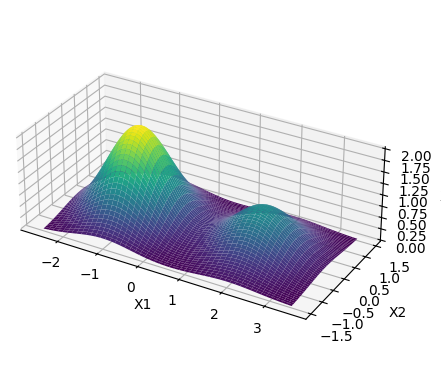

In [26]:
# @title Plotter
# Define the function
def f(x):
    x1, x2 = x
    return 2*np.exp(-((x1 + 1)**2 + x2**2)) + np.exp(-((x1 - 2)**2 + x2**2))
# Create a grid of x and y values
x1 = np.linspace(-2.5, 3.5, 300)
x2 = np.linspace(-1.5, 1.5, 300)
x = np.meshgrid(x1, x2)

# Compute the function values
x3 = f(x)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(x[0], x[1], x3, cmap='viridis', edgecolor='none')

# Set labels
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')

# Set the aspect ratio to be equal
ax.set_box_aspect([6, 3, 2])

**Eksempel 4**. La $f \colon \mathbb{R}^2 \to \mathbb{R}$ være gitt ved
$$g(\begin{bmatrix} x_1 \\ x_2 \end{bmatrix}) =
  -2e^{-((x_1 + 1)^2 + x_2^2)}
  -
  e^{-((x_1 - 2)^2 + x_2^2)}
  .$$ Vi plotter denne funksjonen over rektanglet
$[-2.5,3.5] \times [-1.5, 1.5]$ der $-2.5 \le x_1 \le 3.5$ og
$-1.5 \le x_2 \le 1.5$.

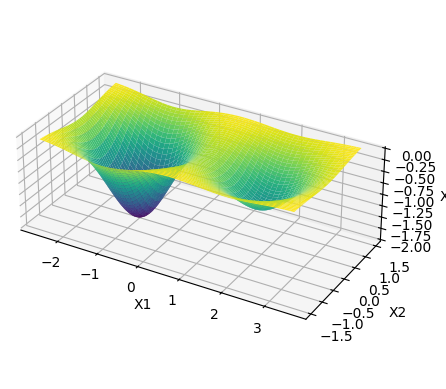

In [27]:
# @title Plotter
# Define the function
def g(x):
    x1, x2 = x
    return -(2*np.exp(-((x1 + 1)**2 + x2**2)) + np.exp(-((x1 - 2)**2 + x2**2)))
# Create a grid of x and y values
x1 = np.linspace(-2.5, 3.5, 300)
x2 = np.linspace(-1.5, 1.5, 300)
x = np.meshgrid(x1, x2)

# Compute the function values
x3 = g(x)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(x[0], x[1], x3, cmap='viridis', edgecolor='none')

# Set labels
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')

# Set the aspect ratio to be equal
ax.set_box_aspect([6, 3, 2])

## Nivåkurver

Funksjoner kan også illusteres ved å tegne nivåkurver. En nivåkurve for
en funksjon $f \colon \mathbb{R}^2 \to \mathbb{R}$ er en kurve i planet
som består av punkter der funksjonen $f$ har samme verdi. Slike
nivåkurver kan illustreres på grafen til funksjonen eller de kan tegnes
i planet. Vi illustrerer dette ved å tegne nivåkurver for funksjonene i
eksemplene over.

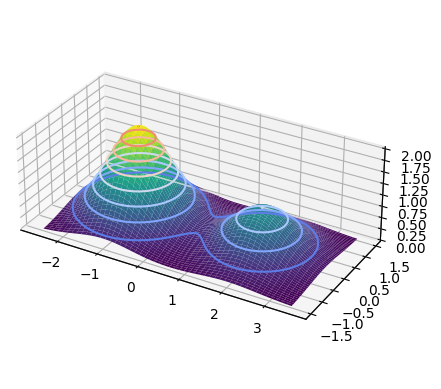

In [28]:
# @title Plotter

def kopier_akse(fig, ax):
    ax2 = fig.add_subplot(1, 1, 1, projection='3d', label="quiver_layer1")
    ax2.patch.set_alpha(0.)
    # Set the same limits and viewing angle for ax2

    ax2.grid(False)  # Remove grid lines
    ax2.xaxis.pane.fill = False  # Hide X pane
    ax2.yaxis.pane.fill = False  # Hide Y pane
    ax2.zaxis.pane.fill = False  # Hide Z pane
    ax2.set_xticks([])  # Remove X ticks
    ax2.set_yticks([])  # Remove Y ticks
    ax2.set_zticks([])  # Remove Z ticks

    # Set the aspect ratio to be equal
    ax2.set_xlim(ax.get_xlim())  # Same x-limits
    ax2.set_ylim(ax.get_ylim())  # Same y-limits
    ax2.set_zlim(ax.get_zlim())  # Same z-limits

    # Ensure the same view angle
    ax2.view_init(elev=ax.elev, azim=ax.azim)  # Copy elevation and azimuthal angles from ax1
    ax2.set_box_aspect(ax.get_box_aspect())
    return ax2

# Define the function
def f(x):
    x1, x2 = x
    return 2*np.exp(-((x1 + 1)**2 + x2**2)) + np.exp(-((x1 - 2)**2 + x2**2))
# Create a grid of x and y values
x1 = np.linspace(-2.5, 3.5, 300)
x2 = np.linspace(-1.5, 1.5, 300)
x = np.meshgrid(x1, x2)

# Compute the function values
x3 = f(x)

# Create a 3D plot

fig = plt.figure(figsize=plt.figaspect(1.))
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot_surface(x[0], x[1], x3, cmap='viridis', edgecolor='none', alpha=1)
ax.set_box_aspect([6, 3, 2])
# ax = plt.figure().add_subplot(projection='3d')
ax2 = kopier_akse(fig, ax)
contour = ax2.contour3D(x1, x2, x3, alpha=1, cmap='coolwarm')  # Plot contour curves

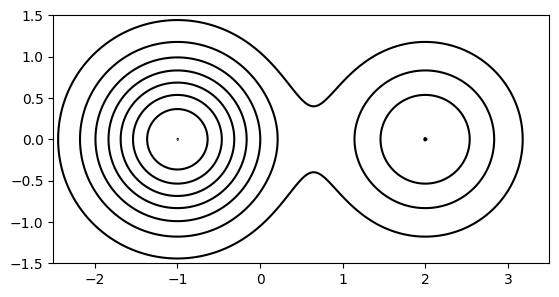

In [29]:
# @title Plotter
# import matplotlib.pyplot as plt

# from matplotlib import cm
# from mpl_toolkits.mplot3d import axes3d

# Define the function
def f(x):
    x1, x2 = x
    return 2*np.exp(-((x1 + 1)**2 + x2**2)) + np.exp(-((x1 - 2)**2 + x2**2))
# Create a grid of x and y values
x1 = np.linspace(-2.5, 3.5, 300)
x2 = np.linspace(-1.5, 1.5, 300)
x = np.meshgrid(x1, x2)

# Compute the function values
x3 = f(x)

# Create a 3D plot
fig, ax = plt.subplots()
# CS = ax.contour(X, Y, Z)
# ax.plot_surface(x[0], x[1], x3, cmap='viridis', edgecolor='none', alpha=0.6)
ax.contour(x1, x2, x3, colors='black', alpha=1) #, cmap=cm.coolwarm)  # Plot contour curves
ax.set_aspect(1)

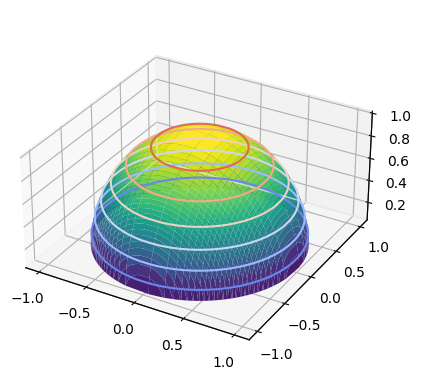

In [30]:
# @title Plotter
# Define the function
def f(x):
    x1, x2 = x
    # bemerk at hvis x ikke er i D, da lar vi f være ikke definert, eller nan for not a number
    return np.where(x1**2 + x2**2 <1, np.sqrt(np.maximum(1 - x1**2 - x2**2, 0)), np.nan)

# Create a grid of x and y values
x1 = np.linspace(-1, 1, 300)
x2 = np.linspace(-1, 1, 300)
x1 = np.sign(x1) * np.sqrt(np.abs(x1))
x2 = np.sign(x2) * np.sqrt(np.abs(x2))
x = np.meshgrid(x1, x2)

# Compute the function values
x3 = f(x)

# Create a 3D plot

fig = plt.figure(figsize=plt.figaspect(1.))
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot_surface(x[0], x[1], x3, cmap='viridis', edgecolor='none', alpha=1)
ax.set_box_aspect([2,2,1])
# ax = plt.figure().add_subplot(projection='3d')
ax2 = kopier_akse(fig, ax)
contour = ax2.contour3D(x1, x2, x3, alpha=1, cmap='coolwarm')  # Plot contour curves
# ax2.set_box_aspect([6, 3, 2])
# ax2.get_box_aspect()

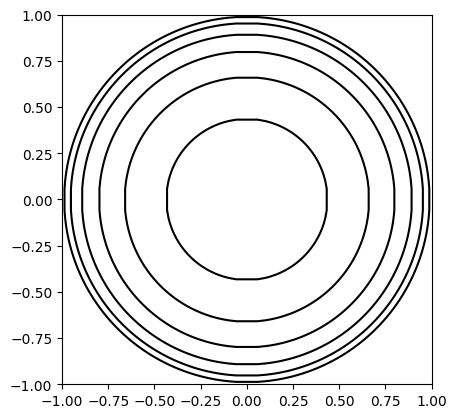

In [31]:
# @title Plotter
# Define the function
def f(x):
    x1, x2 = x
    # bemerk at hvis x ikke er i D, da lar vi f være ikke definert, eller nan for not a number
    return np.where(x1**2 + x2**2 <1, np.sqrt(np.maximum(1 - x1**2 - x2**2, 0)), np.nan)

# Create a grid of x and y values
x1 = np.linspace(-1, 1, 300)
x2 = np.linspace(-1, 1, 300)
x1 = np.sign(x1) * np.sqrt(np.abs(x1))
x2 = np.sign(x2) * np.sqrt(np.abs(x2))
x = np.meshgrid(x1, x2)

# Compute the function values
x3 = f(x)

# Create a 3D plot
fig, ax = plt.subplots()
# CS = ax.contour(X, Y, Z)
# ax.plot_surface(x[0], x[1], x3, cmap='viridis', edgecolor='none', alpha=0.6)
ax.contour(x1, x2, x3, colors='black', alpha=1) #, cmap=cm.coolwarm)  # Plot contour curves
ax.set_aspect(1)

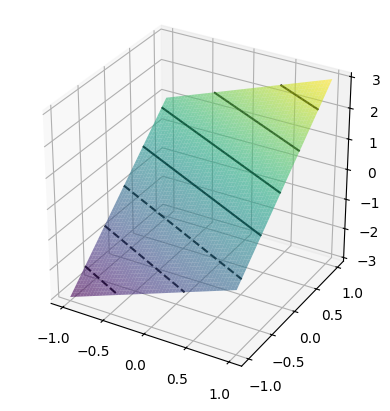

In [32]:
# @title Plotter
A = np.array([[1, 2]])

# Define the function
def f(x):
    x1, x2 = x
    return (A @ np.vstack([[x1.ravel(), x2.ravel()]])).reshape(x1.shape)

# Create a grid of x and y values
x1 = np.linspace(-1, 1, 300)
x2 = np.linspace(-1, 1, 300)
x = np.meshgrid(x1, x2)

# Compute the function values
x3 = f(x)

# # Mask values outside the unit disc
# mask = x**2 + y**2 > 1  # Create a boolean mask for points outside the unit disc
# z[mask] = np.nan  # Set values outside the unit disc to NaN (they won't be plotted)

# Compute the function values
x3 = f(x)

# Create a 3D plot
ax = plt.figure().add_subplot(projection='3d')

ax.plot_surface(x[0], x[1], x3, cmap='viridis', edgecolor='none', alpha=0.6)
ax.contour(x1, x2, x3, colors='black', alpha=1) #, cmap=cm.coolwarm)  # Plot contour curves
ax.set_box_aspect([1, 1, 1])

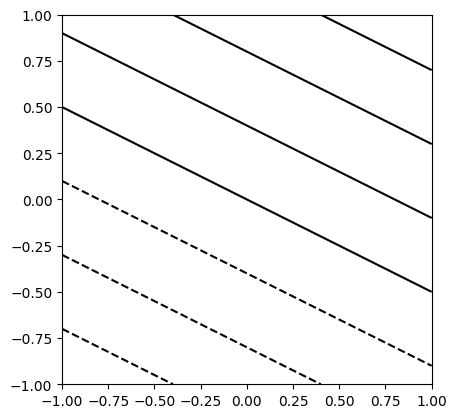

In [33]:
# @title Plotter
A = np.array([[1, 2]])

# Define the function
def f(x):
    x1, x2 = x
    return (A @ np.vstack([[x1.ravel(), x2.ravel()]])).reshape(x1.shape)

# Create a grid of x and y values
x1 = np.linspace(-1, 1, 300)
x2 = np.linspace(-1, 1, 300)
x = np.meshgrid(x1, x2)

# Compute the function values
x3 = f(x)

# # Mask values outside the unit disc
# mask = x**2 + y**2 > 1  # Create a boolean mask for points outside the unit disc
# z[mask] = np.nan  # Set values outside the unit disc to NaN (they won't be plotted)


# Create a 3D plot
fig, ax = plt.subplots()
# CS = ax.contour(X, Y, Z)
# ax.plot_surface(x[0], x[1], x3, cmap='viridis', edgecolor='none', alpha=0.6)
ax.contour(x1, x2, x3, colors='black', alpha=1) #, cmap=cm.coolwarm)  # Plot contour curves
ax.set_aspect(1)

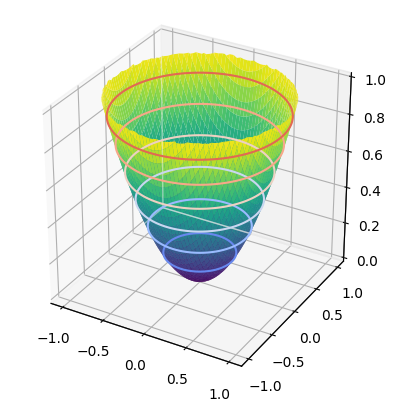

In [34]:
# @title Plotter
# Define the function
def f(x):
    x1, x2 = x
    z = x1**2 + x2**2
    return np.where(z <=1, z, np.nan)

# Create a grid of x and y values
x1 = np.linspace(-1, 1, 300)
x2 = np.linspace(-1, 1, 300)
x = np.meshgrid(x1, x2)

# Compute the function values
x3 = f(x)

# # Mask values outside the unit disc
# mask = x**2 + y**2 > 1  # Create a boolean mask for points outside the unit disc
# z[mask] = np.nan  # Set values outside the unit disc to NaN (they won't be plotted)

# Create a 3D plot

fig = plt.figure(figsize=plt.figaspect(1.))
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot_surface(x[0], x[1], x3, cmap='viridis', edgecolor='none', alpha=1)
ax.set_box_aspect([1,1,1])
# ax = plt.figure().add_subplot(projection='3d')
ax2 = kopier_akse(fig, ax)
contour = ax2.contour3D(x1, x2, x3, alpha=1, cmap='coolwarm')  # Plot contour curves

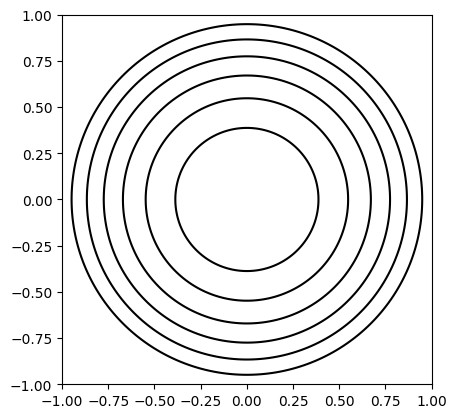

In [35]:
# @title Plotter
# Define the function
def f(x):
    x1, x2 = x
    z = x1**2 + x2**2
    return np.where(z <=1, z, np.nan)

# Create a grid of x and y values
x1 = np.linspace(-1, 1, 300)
x2 = np.linspace(-1, 1, 300)
x = np.meshgrid(x1, x2)

# Compute the function values
x3 = f(x)

# # Mask values outside the unit disc
# mask = x**2 + y**2 > 1  # Create a boolean mask for points outside the unit disc
# z[mask] = np.nan  # Set values outside the unit disc to NaN (they won't be plotted)

# Create a 3D plot
fig, ax = plt.subplots()
# CS = ax.contour(X, Y, Z)
# ax.plot_surface(x[0], x[1], x3, cmap='viridis', edgecolor='none', alpha=0.6)
ax.contour(x1, x2, x3, colors='black', alpha=1) #, cmap=cm.coolwarm)  # Plot contour curves
ax.set_aspect(1)